In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from api_key import gkey
from scipy.stats import linregress


In [2]:
crime = "Resources/UCR_Part_1_Crime_for_Multiple_St._Louis_County_Police_Departments%2C_2019_Year_to_Date.csv"
crime_df = pd.read_csv(crime)
#crime_df

In [4]:
#Read income group by zip information into data frame
incomegroup_df = pd.read_excel (r'2018 St Louis County Income Cat by Zip clean.xlsx')
#incomegroup_df

In [5]:
print(incomegroup_df.columns)

Index(['Unnamed: 0', 'Less than $10,000', '$10,000 to $14,999',
       '$15,000 to $19,999', '$20,000 to $24,999', '$25,000 to $29,999',
       '$30,000 to $34,999', '$35,000 to $39,999', '$40,000 to $44,999',
       '$45,000 to $49,999', '$50,000 to $59,999', '$60,000 to $74,999',
       '$75,000 to $99,999', '$100,000 to $124,999', '$125,000 to $149,999',
       '$150,000 to $199,999', '$200,000 or more'],
      dtype='object')


In [7]:
#Rename the column of Zip Code
incomegroup_df.rename(columns={'Unnamed: 0':'Zip Code'}, inplace=True)
#incomegroup_df

In [8]:
#Regroup income groups
zipcode = incomegroup_df["Zip Code"]
incomebelow25k = incomegroup_df["Less than $10,000"] + incomegroup_df["$10,000 to $14,999"] + incomegroup_df["$15,000 to $19,999"] + incomegroup_df["$20,000 to $24,999"]
income25toless50k = incomegroup_df["$25,000 to $29,999"] + incomegroup_df["$30,000 to $34,999"] + incomegroup_df["$35,000 to $39,999"] + incomegroup_df["$40,000 to $44,999"] + incomegroup_df["$45,000 to $49,999"]
income50ktoless100k = incomegroup_df["$50,000 to $59,999"] + incomegroup_df["$60,000 to $74,999"] + incomegroup_df["$75,000 to $99,999"] 
income100ktoless200k = incomegroup_df["$100,000 to $124,999"] + incomegroup_df["$125,000 to $149,999"] + incomegroup_df["$150,000 to $199,999"]
income200kplus =  incomegroup_df["$200,000 or more"]

In [10]:
#New data frame with fewer income groups
newincomegroup_df = pd.DataFrame({"Zip Code": zipcode,"Less than 25k": 100*incomebelow25k, "25k to $49999": 100*income25toless50k,"50k to $99999": 100*income50ktoless100k,"100k to $199999": 100*income100ktoless200k, "200k and plus": 100*income200kplus})
#newincomegroup_df

In [11]:
#Read the business number information into data frame
businessbyzip_df = pd.read_csv('stlbusinesssum.csv')
businessbyzip_df.rename(columns={'Zip':'Zip Code'}, inplace=True)

In [13]:
# Merge new income group info and the busisness info
business_incomegroup = pd.merge(newincomegroup_df,businessbyzip_df,on='Zip Code',how='outer')
#business_incomegroup

In [15]:
#Import population information
population_df = pd.read_excel (r'St Louis County Zip Population.xlsx')
populationclean_df = population_df[["Zip Code", "Population"]]
#populationclean_df.rename(columns={'ZIP Code':'Zip Code'}, inplace=True)
#populationclean_df

In [16]:
#Merge population info into the business and income DFs)
businessincomepop = pd.merge(business_incomegroup,populationclean_df,on='Zip Code',how='outer')
#businessindex = number of business per 1000 people
businessincomepop["Business Index"] = 1000*businessincomepop["Sum of Business"]/businessincomepop["Population"]
businessincomepop.head(50)

,Zip Code,Less than 25k,25k to $49999,50k to $99999,100k to $199999,200k and plus,Sum of Business,Population,Business Index
0,63005,6.759724,8.422208,15.668130,30.332497,38.817440,1260.0,17753.0,70.973920
1,63011,7.301434,16.243795,27.151131,33.652785,15.650855,1428.0,36347.0,39.287974
2,63017,11.411213,12.704524,22.978826,30.762753,22.142685,1663.0,41470.0,40.101278
3,63021,8.361892,17.116747,31.816313,29.718986,12.986064,638.0,56261.0,11.340005
4,63025,7.255963,13.229104,26.819002,40.448988,12.246943,373.0,13854.0,26.923632
5,63026,11.972978,18.698353,34.411002,27.299596,7.618071,1085.0,44124.0,24.589792
6,63031,14.956680,24.965800,37.209302,20.320337,2.547880,792.0,48212.0,16.427445
7,63033,17.972622,27.006136,35.833137,17.417984,1.770120,747.0,43000.0,17.372093
8,63034,10.230179,11.930194,34.060478,37.415375,6.363773,156.0,17761.0,8.783289
9,63038,4.911433,10.869565,18.760064,38.164251,27.294686,98.0,6914.0,14.174139


In [17]:
#Drop any missing values
combinedclean = businessincomepop.dropna()
combinedclean.head(10)

,Zip Code,Less than 25k,25k to $49999,50k to $99999,100k to $199999,200k and plus,Sum of Business,Population,Business Index
0,63005,6.759724,8.422208,15.668130,30.332497,38.817440,1260.0,17753.0,70.973920
1,63011,7.301434,16.243795,27.151131,33.652785,15.650855,1428.0,36347.0,39.287974
2,63017,11.411213,12.704524,22.978826,30.762753,22.142685,1663.0,41470.0,40.101278
3,63021,8.361892,17.116747,31.816313,29.718986,12.986064,638.0,56261.0,11.340005
4,63025,7.255963,13.229104,26.819002,40.448988,12.246943,373.0,13854.0,26.923632
5,63026,11.972978,18.698353,34.411002,27.299596,7.618071,1085.0,44124.0,24.589792
6,63031,14.956680,24.965800,37.209302,20.320337,2.547880,792.0,48212.0,16.427445
7,63033,17.972622,27.006136,35.833137,17.417984,1.770120,747.0,43000.0,17.372093
8,63034,10.230179,11.930194,34.060478,37.415375,6.363773,156.0,17761.0,8.783289
9,63038,4.911433,10.869565,18.760064,38.164251,27.294686,98.0,6914.0,14.174139


Text(0, 0.5, 'Percent of Household')

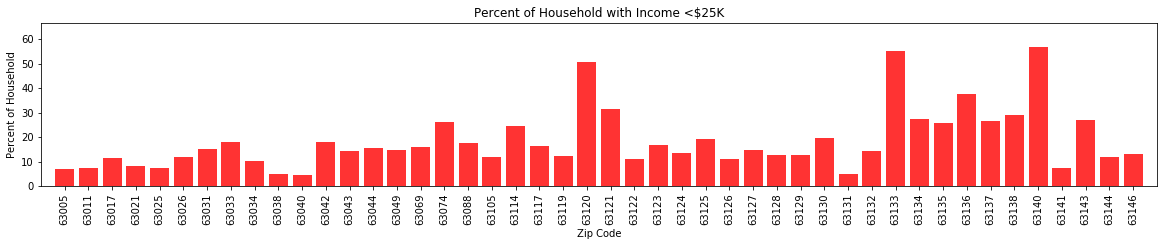

In [18]:
# Create bar plots showing
# Set x axis and tick locations
x_axis = np.arange(len(combinedclean))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, combinedclean["Less than 25k"], color='r', alpha=0.8, align="center")
plt.xticks(tick_locations, combinedclean["Zip Code"], rotation="vertical")
# Set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(combinedclean["Less than 25k"])+10)
plt.title("Percent of Household with Income <$25K")
plt.xlabel("Zip Code")
plt.ylabel("Percent of Household")

Text(0, 0.5, 'Percent of Household')

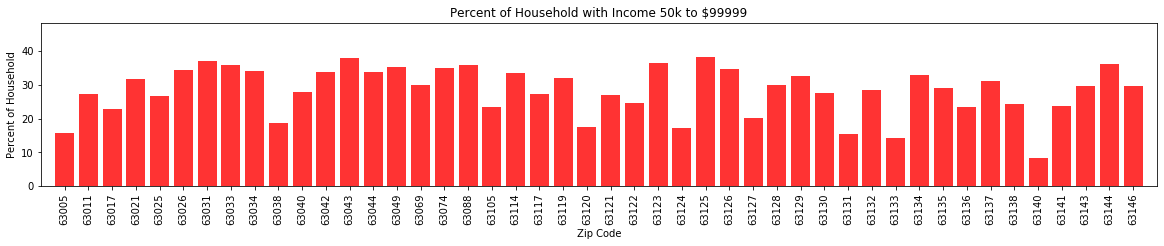

In [19]:
plt.figure(figsize=(20,3))
plt.bar(x_axis, combinedclean["50k to $99999"], color='r', alpha=0.8, align="center")
plt.xticks(tick_locations, combinedclean["Zip Code"], rotation="vertical")
# Set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(combinedclean["50k to $99999"])+10)
plt.title("Percent of Household with Income 50k to $99999")
plt.xlabel("Zip Code")
plt.ylabel("Percent of Household")

Text(0, 0.5, 'Percent of Household')

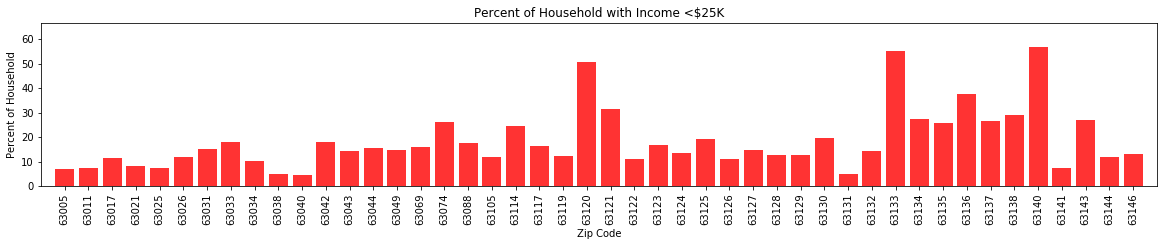

In [20]:
# Create bar plots showing
# Set x axis and tick locations
x_axis = np.arange(len(combinedclean))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, combinedclean["Less than 25k"], color='r', alpha=0.8, align="center")
plt.xticks(tick_locations, combinedclean["Zip Code"], rotation="vertical")
# Set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(combinedclean["Less than 25k"])+10)
plt.title("Percent of Household with Income <$25K")
plt.xlabel("Zip Code")
plt.ylabel("Percent of Household")

Text(0, 0.5, 'Percent of Household')

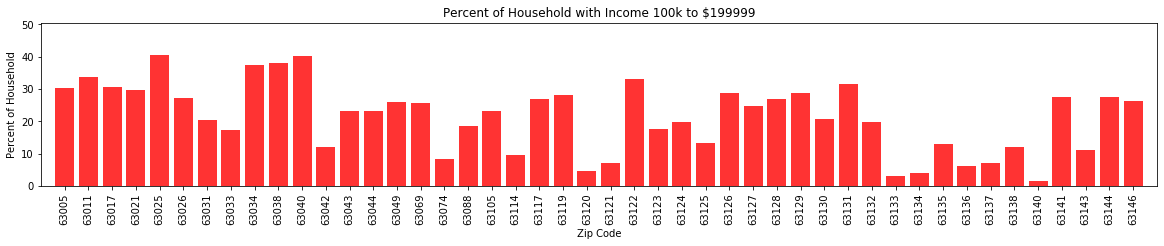

In [21]:
plt.figure(figsize=(20,3))
plt.bar(x_axis, combinedclean["100k to $199999"], color='r', alpha=0.8, align="center")
plt.xticks(tick_locations, combinedclean["Zip Code"], rotation="vertical")
# Set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(combinedclean["100k to $199999"])+10)
plt.title("Percent of Household with Income 100k to $199999")
plt.xlabel("Zip Code")
plt.ylabel("Percent of Household")

Text(0, 0.5, 'Percent of Household')

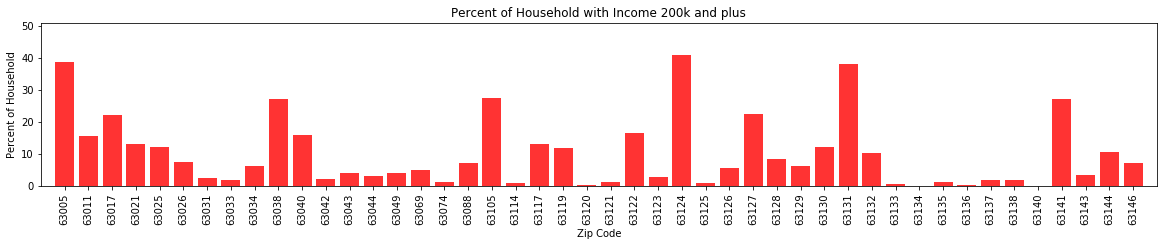

In [22]:
plt.figure(figsize=(20,3))
plt.bar(x_axis, combinedclean["200k and plus"], color='r', alpha=0.8, align="center")
plt.xticks(tick_locations, combinedclean["Zip Code"], rotation="vertical")
# Set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(combinedclean["200k and plus"])+10)
plt.title("Percent of Household with Income 200k and plus")
plt.xlabel("Zip Code")
plt.ylabel("Percent of Household")

Text(0, 0.5, 'Business Index')

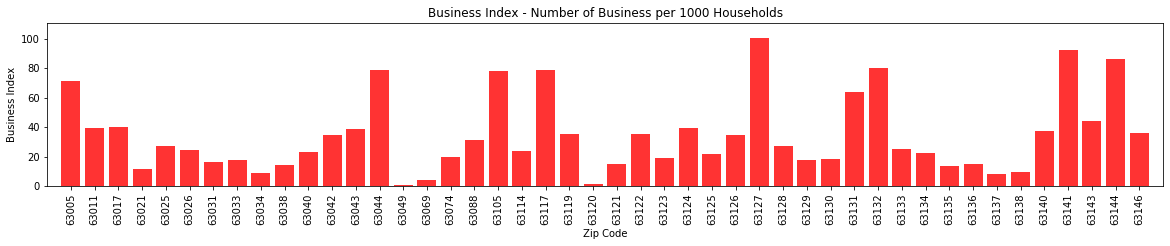

In [23]:
plt.figure(figsize=(20,3))
plt.bar(x_axis, combinedclean["Business Index"], color='r', alpha=0.8, align="center")
plt.xticks(tick_locations, combinedclean["Zip Code"], rotation="vertical")
# Set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(combinedclean["Business Index"])+10)
plt.title("Business Index - Number of Business per 1000 Households")
plt.xlabel("Zip Code")
plt.ylabel("Business Index")

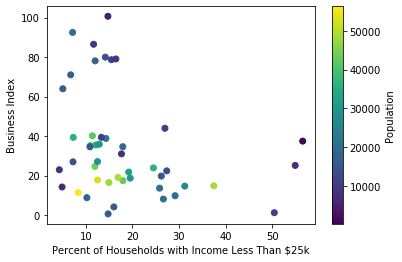

In [24]:
#Plot the low income groups with business index
plt.scatter(combinedclean["Less than 25k"],combinedclean["Business Index"],c=combinedclean["Population"])
clb = plt.colorbar()
plt.xlabel("Percent of Households with Income Less Than $25k")
plt.ylabel("Business Index")
clb.set_label("Population")
plt.show()

The r-squared is: 0.08915459563634764
The p-value is: 0.043838984555990494
The regression line is: y = -0.64x + 46.07


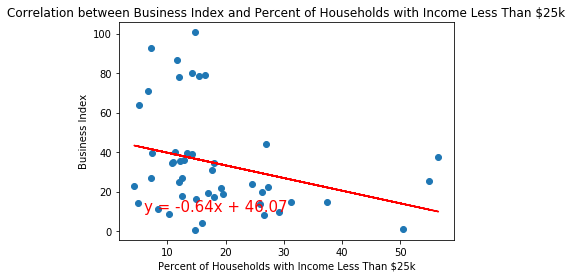

In [25]:
#Regression analysis of income group <25k with business index
# Add the linear regression equation and line to plot
x_values = combinedclean["Less than 25k"]
y_values = combinedclean["Business Index"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Percent of Households with Income Less Than $25k')
plt.ylabel('Business Index')
plt.title("Correlation between Business Index and Percent of Households with Income Less Than $25k")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
print(f"The regression line is: {line_eq}")
plt.show()

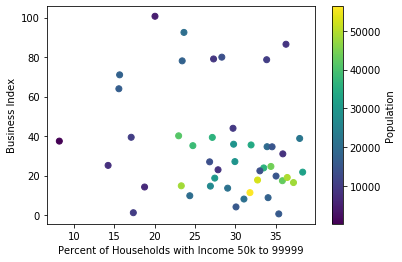

In [26]:
#Plot the mid income groups with business index
plt.scatter(combinedclean["50k to $99999"],combinedclean["Business Index"],c=combinedclean["Population"])
clb = plt.colorbar()
plt.xlabel("Percent of Households with Income 50k to 99999")
plt.ylabel("Business Index")
clb.set_label("Population")
plt.show()

The r-squared is: 0.05204718898891229
The p-value is: 0.12727981326037033


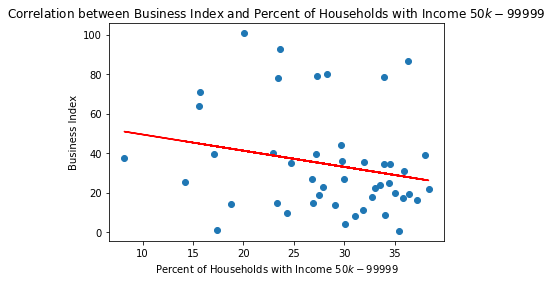

In [27]:
#Regression analysis of income group 50k to 99999 with business index
# Add the linear regression equation and line to plot
x_values = combinedclean["50k to $99999"]
y_values = combinedclean["Business Index"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Percent of Households with Income $50k-$99999')
plt.ylabel('Business Index')
plt.title("Correlation between Business Index and Percent of Households with Income $50k-$99999")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

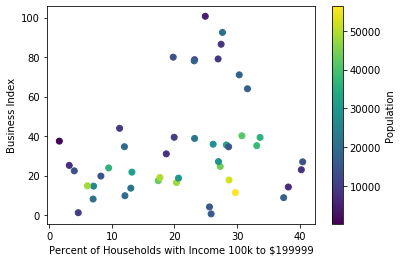

In [28]:
#Plot the mid income groups with business index
plt.scatter(combinedclean["100k to $199999"],combinedclean["Business Index"],c=combinedclean["Population"])
clb = plt.colorbar()
plt.xlabel("Percent of Households with Income 100k to $199999")
plt.ylabel("Business Index")
clb.set_label("Population")
plt.show()

The r-squared is: 0.05644625384380503
The p-value is: 0.11186015622972231


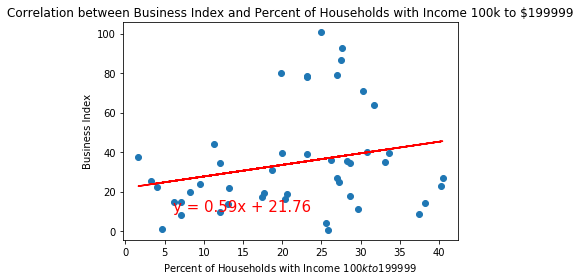

In [29]:
#Regression analysis of income group 100k to $199999 with business index
# Add the linear regression equation and line to plot
x_values = combinedclean["100k to $199999"]
y_values = combinedclean["Business Index"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Percent of Households with Income $100k to $199999')
plt.ylabel('Business Index')
plt.title("Correlation between Business Index and Percent of Households with Income 100k to $199999")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

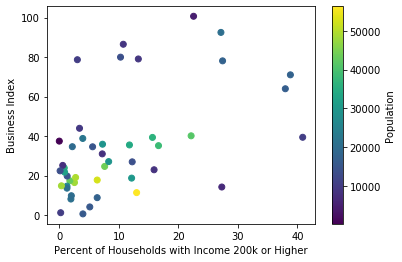

In [30]:
#Plot the mid income groups with business index
plt.scatter(combinedclean["200k and plus"],combinedclean["Business Index"],c=combinedclean["Population"])
clb = plt.colorbar()
plt.xlabel("Percent of Households with Income 200k or Higher")
plt.ylabel("Business Index")
clb.set_label("Population")
plt.show()

The r-squared is: 0.27295374007055695
The p-value is: 0.00019575187996695345
The regression line is: y = 1.24x + 21.81


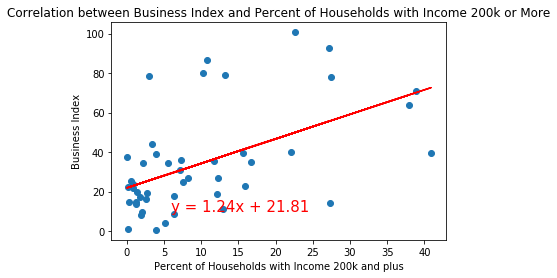

In [31]:
#Regression analysis of income group $200k and plus with business index
# Add the linear regression equation and line to plot
x_values = combinedclean["200k and plus"]
y_values = combinedclean["Business Index"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Percent of Households with Income 200k and plus')
plt.ylabel('Business Index')
plt.title("Correlation between Business Index and Percent of Households with Income 200k or More")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
print(f"The regression line is: {line_eq}")
plt.show()

In [32]:
crime_df.columns

Index(['X', 'Y', 'UCRCOUNT', 'COMPLAINTYEAR', 'COMPLAINTNUM', 'UCR_OFFENSE',
       'UCR_CRIME_CODE', 'TYPE', 'MONTH', 'YEAR', 'DT_CALLREC', 'D_OCCURRED',
       'DOW_OCCURRED', 'ZONE', 'ADDRESS', 'PRECINCT', 'PREMISE',
       'REPORTING_JURIS', 'FOR_JURIS', 'X.1', 'Y.1', 'OBJECTID'],
      dtype='object')

In [34]:
reduced_crime_df = crime_df.loc[:, ['X', 'Y', 'COMPLAINTYEAR', 'UCR_OFFENSE', 'TYPE', 'YEAR',
                                    'ADDRESS']]
#reduced_crime_df

In [36]:
year_df = reduced_crime_df.loc[reduced_crime_df['COMPLAINTYEAR'] >= 19]
#year_df

In [37]:
ryear_df = year_df.loc[:, ['X', 'Y', 'UCR_OFFENSE', 'TYPE', 'YEAR',
                                    'ADDRESS']]
ryear_df.dropna(inplace = True) 

ryear_df = ryear_df.reset_index(drop=True)
ryear_df

,X,Y,UCR_OFFENSE,TYPE,YEAR,ADDRESS
0,-90.268498,38.703995,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,5200 HELEN AVE
1,-90.197312,38.753107,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,CAMERON RD & ROSS CIR
2,-90.182395,38.777746,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,610 PRIGGE RD
3,-90.470593,38.540136,"ROBBERY, FIREARM",PERSON,2019,1860 BOWLES AVE
4,-90.449337,38.614038,"ROBBERY, FIREARM",PERSON,2019,1909 WINDMOOR PL
...,...,...,...,...,...,...
16453,-90.245846,38.745910,"MOTOR VEHICLE THEFT, TRUCK/BUS",PROPERTY,2019,9810 DUKE DR
16454,-90.546271,38.606776,"MOTOR VEHICLE THEFT, OTHER VEHICLE",PROPERTY,2019,328 NORWICH CT
16455,-90.295168,38.543718,"MOTOR VEHICLE THEFT, OTHER VEHICLE",PROPERTY,2019,4190 HOFFMEISTER AVE
16456,-90.448450,38.539104,"MOTOR VEHICLE THEFT, OTHER VEHICLE",PROPERTY,2019,1710 FENPARK DR


In [38]:
ryear_df['Zipcode'] = ""
ryear_df.head()

,X,Y,UCR_OFFENSE,TYPE,YEAR,ADDRESS,Zipcode
0,-90.268498,38.703995,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,5200 HELEN AVE,
1,-90.197312,38.753107,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,CAMERON RD & ROSS CIR,
2,-90.182395,38.777746,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,610 PRIGGE RD,
3,-90.470593,38.540136,"ROBBERY, FIREARM",PERSON,2019,1860 BOWLES AVE,
4,-90.449337,38.614038,"ROBBERY, FIREARM",PERSON,2019,1909 WINDMOOR PL,


In [8]:
# # TEST DATA
# ryear_df_test = ryear_df.head()
# locations = ryear_df_test[["X", "Y"]]

# #locations = ryear_df[["X", "Y"]]

# #geo_data = requests.get(target_url).json()
# type(locations)
# params = {"key": gkey}
# #for i in locations:
#    # print(i)
# master_zips= []

In [9]:
# # TEST DATA
# #ryear_df_test = ryear_df.head(5).copy()
# #locations = ryear_df_test[["X", "Y", 'Zipcode']]

# locations = ryear_df[["X", "Y", 'Zipcode']]

# #geo_data = requests.get(target_url).json()
# type(locations)
# params = {"key": gkey}
# #for i in locations:
#    # print(i)
# master_zips= []
# try:
#     for index, data in locations.iterrows():
#         if  data['Zipcode'] == '':

#             url = f'https://maps.googleapis.com/maps/api/geocode/json?latlng={data["Y"]},{data["X"]}&key={params["key"]}'
#             #print(url)
#             response = requests.get(url).json()
#             zip_list = []
#             results = response['results']


#             for result in results:
#             #print(result)
#                 if result.get('address_components'):
#                     for component in result.get('address_components'):
#                         #print(component)
#                         ctype = (component.get("types"))[0]
#                         if ctype == 'postal_code':
#                             current_zip = component.get('short_name')
#                             zip_list.append(current_zip)

#                 zip_list = list(set(zip_list))

#           #  master_zips.append(zip_list)
#             ryear_df.loc[index, 'Zipcode'] = zip_list[0]
# except ValueError:
#     print('There is something wrong with this zipcode!')

In [40]:
#ryear_df.head(17000)


In [11]:
#cryear_df = ryear_df.copy()
#ryear_df.to_csv('Zip.csv')

In [41]:
csv_path = "Resources/Zip.csv"
zip_df = pd.read_csv(csv_path)
zip_df.head()

,Unnamed: 0,X,Y,UCR_OFFENSE,TYPE,YEAR,ADDRESS,Zipcode
0,0,-90.268498,38.703995,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,5200 HELEN AVE,63136
1,1,-90.197312,38.753107,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,CAMERON RD & ROSS CIR,63137
2,2,-90.182395,38.777746,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,610 PRIGGE RD,63138
3,3,-90.470593,38.540136,"ROBBERY, FIREARM",PERSON,2019,1860 BOWLES AVE,63026
4,4,-90.449337,38.614038,"ROBBERY, FIREARM",PERSON,2019,1909 WINDMOOR PL,63131


In [42]:
zip_df = zip_df.loc[:, ['UCR_OFFENSE', 'TYPE', 'YEAR',
                                    'ADDRESS', 'Zipcode']]
zip_df

,UCR_OFFENSE,TYPE,YEAR,ADDRESS,Zipcode
0,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,5200 HELEN AVE,63136
1,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,CAMERON RD & ROSS CIR,63137
2,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,610 PRIGGE RD,63138
3,"ROBBERY, FIREARM",PERSON,2019,1860 BOWLES AVE,63026
4,"ROBBERY, FIREARM",PERSON,2019,1909 WINDMOOR PL,63131
...,...,...,...,...,...
16453,"MOTOR VEHICLE THEFT, TRUCK/BUS",PROPERTY,2019,9810 DUKE DR,63136
16454,"MOTOR VEHICLE THEFT, OTHER VEHICLE",PROPERTY,2019,328 NORWICH CT,63011
16455,"MOTOR VEHICLE THEFT, OTHER VEHICLE",PROPERTY,2019,4190 HOFFMEISTER AVE,63125
16456,"MOTOR VEHICLE THEFT, OTHER VEHICLE",PROPERTY,2019,1710 FENPARK DR,63026


In [43]:
zip_df.dtypes

UCR_OFFENSE    object
TYPE           object
YEAR            int64
ADDRESS        object
Zipcode         int64
dtype: object

In [44]:
jennings_df = zip_df[zip_df.Zipcode == 63136]
jnn_df = jennings_df['Zipcode'].value_counts()
jg_df = (jnn_df * 1000) / 48560
jg_df

63136    44.0486
Name: Zipcode, dtype: float64

In [45]:
north_df = zip_df[zip_df.Zipcode == 63137]
spanish_lake_df = zip_df[zip_df.Zipcode == 63138]
fenton_df = zip_df[zip_df.Zipcode == 63026]
town_country_df = zip_df[zip_df.Zipcode == 63131]
webster_df = zip_df[zip_df.Zipcode == 63119]
kirkwood_df = zip_df[zip_df.Zipcode == 63122]
manchester_df = zip_df[zip_df.Zipcode == 63011]
mehlville_df = zip_df[zip_df.Zipcode == 63125]
wildwood_df = zip_df[zip_df.Zipcode == 63040]
ucity_df = zip_df[zip_df.Zipcode == 63130]
sunhills_df = zip_df[zip_df.Zipcode == 63127]
stann_df = zip_df[zip_df.Zipcode == 63074]

In [46]:
rheights_df = zip_df[zip_df.Zipcode == 63117]
ballwin_df = zip_df[zip_df.Zipcode == 63021]
berkeley_df = zip_df[zip_df.Zipcode == 63134]
brentwood_df = zip_df[zip_df.Zipcode == 63144]
bridgeton_df = zip_df[zip_df.Zipcode == 63044]
chesterfield_df = zip_df[zip_df.Zipcode == 63017]
clayton_df = zip_df[zip_df.Zipcode == 63105]
chesterfields_df = zip_df[zip_df.Zipcode == 63005] 
concord_df = zip_df[zip_df.Zipcode == 63128]
eureka_df = zip_df[zip_df.Zipcode == 63025]
mheights_df = zip_df[zip_df.Zipcode == 63043] 
ccoeur_df = zip_df[zip_df.Zipcode == 63141]
jamestown_df = zip_df[zip_df.Zipcode == 63034]
stl_df = zip_df[zip_df.Zipcode == 63146]
vpark_df = zip_df[zip_df.Zipcode == 63088] 

In [47]:
pagedale_df = zip_df[zip_df.Zipcode == 63133]
overland_df = zip_df[zip_df.Zipcode == 63114]
olivette_df = zip_df[zip_df.Zipcode == 63132]
oakville_df = zip_df[zip_df.Zipcode == 63129]
maplewood_df = zip_df[zip_df.Zipcode == 63143]
ladue_df = zip_df[zip_df.Zipcode == 63124]
kinloch_df = zip_df[zip_df.Zipcode == 63140]
hazelwood_df = zip_df[zip_df.Zipcode == 63042]
florissant_df = zip_df[zip_df.Zipcode == 63033]
newflorissant_df = zip_df[zip_df.Zipcode == 63031]
ferguson_df = zip_df[zip_df.Zipcode == 63135]
#crestwood_df == zip_df[zip_df.Zipcode == 63126]
affton_df = zip_df[zip_df.Zipcode == 63123]

In [63]:
crime_df = zip_df['Zipcode'].value_counts()
crime_df

63136    2139
63125    1147
63138     925
63129     901
63137     871
63117     782
63123     716
63121     685
63033     670
63119     627
63144     608
63114     580
63026     549
63128     490
63017     478
63005     393
63011     390
63141     319
63143     304
63146     241
63132     240
63133     214
63034     202
63105     186
63021     185
63031     181
63131     181
63134     176
63122     156
63025     148
63127     143
63124     138
63088     114
63126      84
63069      57
63074      47
63044      34
63038      31
63040      31
63140      21
63045      20
63135      16
63049      14
63130       7
63043       4
63145       2
63042       2
63167       2
63108       1
63115       1
63110       1
63147       1
63106       1
63112       1
63120       1
Name: Zipcode, dtype: int64

In [56]:
town_country_df


,UCR_OFFENSE,TYPE,YEAR,ADDRESS,Zipcode
4,"ROBBERY, FIREARM",PERSON,2019,1909 WINDMOOR PL,63131
5,"ROBBERY, FIREARM",PERSON,2019,814 S LINDBERGH BLVD,63131
323,LARCENY $200 AND OVER,PROPERTY,2019,12847 DAYLIGHT DR,63131
334,LARCENY $200 AND OVER,PROPERTY,2019,3015 N BALLAS RD,63131
341,LARCENY $200 AND OVER,PROPERTY,2019,101 FRONTENAC FOREST ST,63131
...,...,...,...,...,...
15970,LARCENY $50 TO $199,PROPERTY,2019,10406 CONWAY RD,63131
15971,LARCENY $50 TO $199,PROPERTY,2019,801 S SPOEDE RD,63131
16005,LARCENY UNDER $50,PROPERTY,2019,13430 MASON VALLEY CT,63131
16006,LARCENY UNDER $50,PROPERTY,2019,1558 MASON VALLEY RD,63131


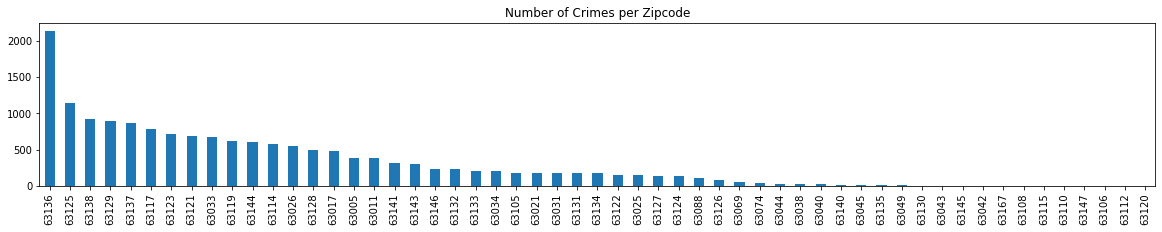

In [50]:
crime_df.plot(kind='bar', figsize = (20,3))
#state_and_inches.plot(kind="bar", figsize=(20,3))
plt.title('Number of Crimes per Zipcode')

plt.show()
#plt.tight_layout()

([<matplotlib.patches.Wedge at 0x27afc256940>,
 [Text(0.07614110761792825, -1.0973616230444343, 'Person'),
  Text(-0.07614100487551775, 1.0973616301732745, 'Property')],
 [Text(0.04153151324614268, -0.5985608852969642, '74.4%'),
  Text(-0.04153145720482786, 0.5985608891854224, '25.6%')])

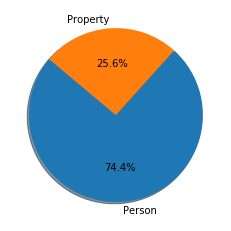

In [51]:
jenn_df = jennings_df['TYPE'].value_counts()
jenn_df
types = ['Person', 'Property']
#types = jennings_df['Type']
plt.pie(jenn_df, labels=types, autopct="%1.1f%%", shadow=True, startangle=140)

#plt.pie(sex_pd, labels=gender, autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x27afcf222e8>,
 [Text(0.6782301156235466, -0.8660276613718935, 'Person'),
  Text(-0.6782300548110235, 0.8660277089972561, 'Property')],
 [Text(0.3699436994310254, -0.4723787243846691, '93.4%'),
  Text(-0.36994366626055825, 0.47237875036213967, '6.6%')])

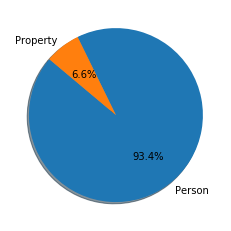

In [59]:
tc_df = town_country_df['TYPE'].value_counts()
tc_df
types = ['Person', 'Property']
plt.pie(tc_df, labels=types, autopct="%1.1f%%", shadow=True, startangle=140)

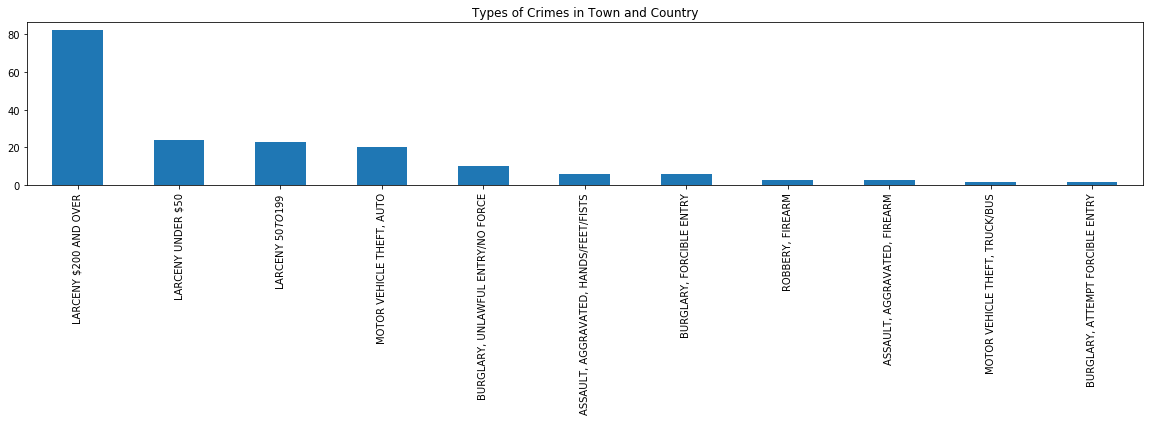

In [60]:
# #what kind of crime
tcc_df = town_country_df['UCR_OFFENSE'].value_counts()
tcc_df.plot(kind='bar', figsize = (20,3))
#state_and_inches.plot(kind="bar", figsize=(20,3))
plt.title('Types of Crimes in Town and Country')

plt.show()
#plt.tight_layout()

([<matplotlib.patches.Wedge at 0x27af8dfcba8>,
 [Text(0.46122960533358115, -0.9986326908147105, 'Person'),
  Text(-0.46122965208295025, 0.9986326692229935, 'Property')],
 [Text(0.2515797847274079, -0.5447087404443874, '86.0%'),
  Text(-0.2515798102270637, 0.5447087286670873, '14.0%')])

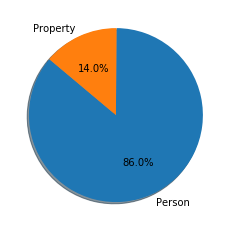

In [53]:
stl_df = zip_df['TYPE'].value_counts()
stl_df
types = ['Person', 'Property']
plt.pie(stl_df, labels=types, autopct="%1.1f%%", shadow=True, startangle=140)

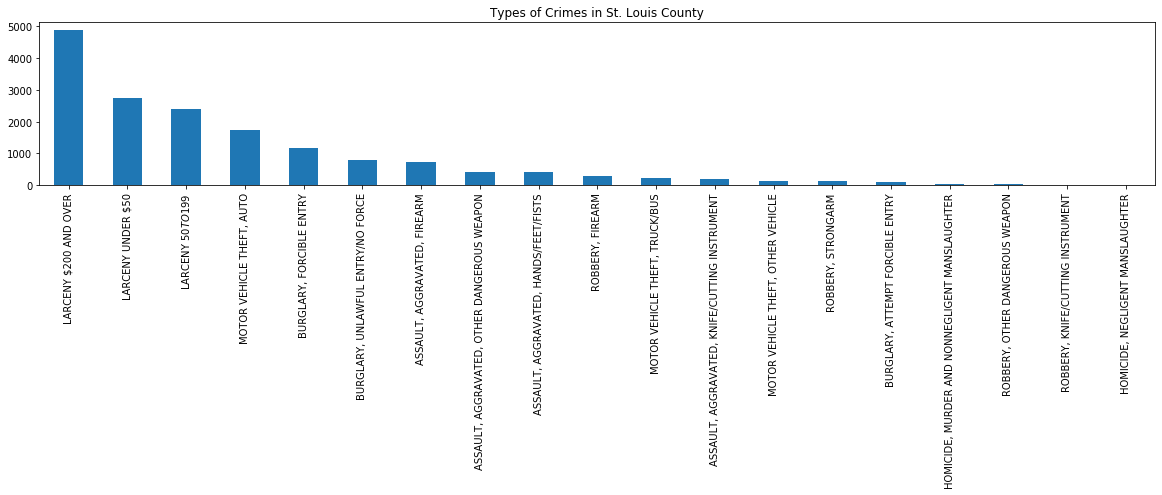

In [62]:
stlc_df = zip_df['UCR_OFFENSE'].value_counts()
stlc_df.plot(kind='bar', figsize = (20,3))
#state_and_inches.plot(kind="bar", figsize=(20,3))
plt.title('Types of Crimes in St. Louis County')

plt.show()
#plt.tight_layout()

([<matplotlib.patches.Wedge at 0x27af941f390>,
 [Text(0.5537645801299849, -0.950444522207089, 'Person'),
  Text(-0.5537646023767449, 0.950444509245293, 'Property')],
 [Text(0.30205340734362807, -0.5184242848402303, '89.0%'),
  Text(-0.3020534194782244, 0.5184242777701598, '11.0%')])

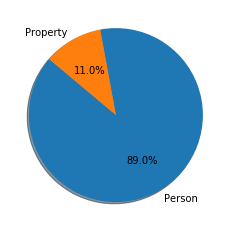

In [54]:
mehl_df = mehlville_df['TYPE'].value_counts()
mehl_df
types = ['Person', 'Property']
plt.pie(mehl_df, labels=types, autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x27afc1e4f28>,
 [Text(0.7258622097517025, -0.8265131895223304, 'Person'),
  Text(-0.7258621710598271, 0.8265132235023916, 'Property')],
 [Text(0.3959248416827467, -0.45082537610308926, '95.2%'),
  Text(-0.3959248205780875, 0.45082539463766813, '4.8%')])

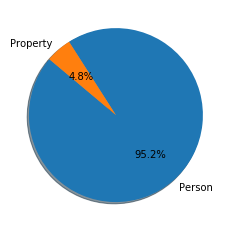

In [55]:
clay_df = clayton_df['TYPE'].value_counts()
clay_df
types = ['Person', 'Property']
plt.pie(clay_df, labels=types, autopct="%1.1f%%", shadow=True, startangle=140)